# knn_final_report

In [1]:
import numpy as np
from PIL import Image
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import statsmodels.formula.api as smf    

In [3]:
import cv2
"""import cv2
im = cv2.imread("abc.tiff")
print type(im)"""

'import cv2\nim = cv2.imread("abc.tiff")\nprint type(im)'

# Preparing data

In [3]:
train_directory="../train2/"
test_directory="../test3/"

def images(image_directory):
    return [image_directory + image  for image in os.listdir(image_directory)]
  
    '''이미지 디렉토리에 있는 리스트를 뽑아주고 주소와 이미지 이름을 같이출력'''



def extract_labels(file_names):
    n=len(file_names)
    y=np.zeros(n,dtype=np.int32)
    
    for i,filename in enumerate(file_names):
        if 'cat'in str(filename):
            y[i]=0
        else:
            y[i]=1
            
    return y

    '''이미지 디렉토리로 부터 리스트에 있는 이름을 추출하여 classification을 해줌, 답안지를 만드는 과정'''
    ''' 고양이라는 이미지에 0을 할당 개에 1할당'''

# encoding image and flattening image

In [4]:
def img_to_matrix(filename, verbose=False):
        
    
    img = cv2.imread(filename)
    '''이미지  파일명으로 파일을 불러와서 그걸 rgb픽셀 넘파이로 바꿔주는 작업'''
    if verbose == True:
        print ("Changing size from")
        
    '''verbose는 여기서 프로그램이 잘돌고 있는지 알려준다. 에러나 예를 보여줌'''
    '''디버그 관련한 것을 보여주는 false인 경우 안보여 줘도 된다.'''
    imag = cv2.resize(img,(48,48))
    '''이미지 사이즈를 48, 48로 줄여준다.'''
    """resized_image = cv2.resize(image, (100, 50)) """
    
    '''img = list(img.getdata())
    픽셀값을 가지는 시퀀스 객체로 만들어준다. 
    img = map(list, img)
    리스트로 안에 있는 데이터 값을 맵핑해준다. 캐스팅해준다고 생각하자
    img = np.array(img)'''
    return imag

    '''이미지를 리사이즈 하고 그에 따른 값들을 리스트로 캐스팅해줌'''
def flatten_image(img):

    '''s = img.shape[0] * img.shape[1]
    img_wide = img.reshape(1, s)
    return img_wide[0]'''
    '''이미지를 1차원으로 펴주는 작업'''
    flattened = img.flatten()
    return flattened

# preparing x_train, y_train image

In [14]:
train_image_names=images(train_directory)
'''트레인 이미지에서 이름을 리스트로 뽑는작업'''
y_train=extract_labels(train_image_names)
'''트레인 이미지로 부터 y label을 할당하는 작업'''
np.save('y_train',y_train)

'''여기까지 y_train 준비!!'''


x_train=[]

for i in images(train_directory): 
    img=img_to_matrix(i)
    img=flatten_image(img)
    x_train.append(img)
'''x_train 준비'''    
    



'x_train \xec\xa4\x80\xeb\xb9\x84'

In [16]:
x_train=np.array(x_train)
x_train 

array([[ 92, 169, 208, ...,   0,   2,   2],
       [ 42,  43,  39, ...,  22,  28,  41],
       [ 53,  45,  38, ...,  10, 185, 188],
       ..., 
       [107, 106, 114, ..., 161, 161, 173],
       [ 74, 104, 150, ...,  31,  70, 116],
       [178, 178, 178, ...,  19, 103, 161]], dtype=uint8)

# preparing x_test, y_test image

In [17]:
test_image_names=images(test_directory) 

y_test=extract_labels(test_image_names)
np.save('y_test',y_test)



test_images=images(test_directory)

x_test = [ ]
for i in test_images:
    img = img_to_matrix(i)
    img = flatten_image(img)
    x_test.append(img)

x_test = np.array(x_test)
x_test.shape


(800, 6912)

In [18]:
x_train=x_train.astype(dtype='float')
x_test=x_test.astype(dtype='float')

# scale

In [9]:
from sklearn import preprocessing,grid_search,cross_validation,metrics,decomposition

scaler=preprocessing.MinMaxScaler(feature_range=(-1,1)).fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

c:\python27\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
c:\python27\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [13]:
x_train

array([[-0.27843137,  0.3254902 ,  0.63137255, ..., -1.        ,
        -0.98431373, -0.98431373],
       [-0.67058824, -0.6627451 , -0.69411765, ..., -0.82745098,
        -0.78039216, -0.67843137],
       [-0.58431373, -0.64705882, -0.70196078, ..., -0.92156863,
         0.45098039,  0.4745098 ],
       ..., 
       [-0.16078431, -0.16862745, -0.10588235, ...,  0.2627451 ,
         0.2627451 ,  0.35686275],
       [-0.41960784, -0.18431373,  0.17647059, ..., -0.75686275,
        -0.45098039, -0.09019608],
       [ 0.39607843,  0.39607843,  0.39607843, ..., -0.85098039,
        -0.19215686,  0.2627451 ]])

# scale2

In [19]:
x_train /= 255
x_test /= 255

In [20]:
x_train

array([[ 0.36078431,  0.6627451 ,  0.81568627, ...,  0.        ,
         0.00784314,  0.00784314],
       [ 0.16470588,  0.16862745,  0.15294118, ...,  0.08627451,
         0.10980392,  0.16078431],
       [ 0.20784314,  0.17647059,  0.14901961, ...,  0.03921569,
         0.7254902 ,  0.7372549 ],
       ..., 
       [ 0.41960784,  0.41568627,  0.44705882, ...,  0.63137255,
         0.63137255,  0.67843137],
       [ 0.29019608,  0.40784314,  0.58823529, ...,  0.12156863,
         0.2745098 ,  0.45490196],
       [ 0.69803922,  0.69803922,  0.69803922, ...,  0.0745098 ,
         0.40392157,  0.63137255]])

# Modeling and fitting

In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

#  train predict

In [22]:
y_predict_knn = knn.predict(x_train)
y_predict_knn

array([0, 0, 0, ..., 1, 0, 0])

In [26]:
y_predict_knn_test = knn.predict(x_test)


In [80]:
predict_pro=knn.predict_proba(train_x)

# report

In [24]:
from sklearn.metrics import classification_report
print (classification_report(y_train,y_predict_knn))

             precision    recall  f1-score   support

          0       0.66      0.84      0.74      1000
          1       0.77      0.56      0.65      1000

avg / total       0.72      0.70      0.69      2000



In [27]:
from sklearn.metrics import classification_report
print (classification_report(y_test,y_predict_knn_test))

             precision    recall  f1-score   support

          0       0.52      0.69      0.59       400
          1       0.54      0.36      0.43       400

avg / total       0.53      0.52      0.51       800



In [29]:
print (knn.score(train_x,y_train))

NameError: name 'train_x' is not defined

In [14]:
print (knn.score(x_test,y_test))

0.527431421446


# if  more  k?

# more K TRAIN-SCORE

In [33]:
from sklearn import metrics
from sklearn.metrics import classification_report
k_range=range(1,10)
accuracy_scores=[]

for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_train)
    conf_mat=metrics.confusion_matrix(y_train,y_pred)
  
    print (classification_report(y_train,y_pred))
    TP = conf_mat[1,1]
    TN = conf_mat[0,0]
    FP = conf_mat[0,1]
    FN = conf_mat[1,0]
    print ("if k ={} ACCURACY is {}".format(k,(TP+TN/float((FP+TN+FN+ TP)))))
    accuracy_scores.append((TP+TN/float((FP+TN+FN+ TP))))
    
list(zip(k_range, accuracy_scores))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00      1000
          1       1.00      1.00      1.00      1000

avg / total       1.00      1.00      1.00      2000

if k =1 ACCURACY is 1000.5
             precision    recall  f1-score   support

          0       0.62      1.00      0.76      1000
          1       1.00      0.38      0.55      1000

avg / total       0.81      0.69      0.66      2000

if k =2 ACCURACY is 383.5
             precision    recall  f1-score   support

          0       0.69      0.85      0.76      1000
          1       0.81      0.62      0.70      1000

avg / total       0.75      0.74      0.73      2000

if k =3 ACCURACY is 618.427
             precision    recall  f1-score   support

          0       0.61      0.93      0.74      1000
          1       0.86      0.39      0.54      1000

avg / total       0.73      0.66      0.64      2000

if k =4 ACCURACY is 393.467
             precision    recal

[(1, 1000.5),
 (2, 383.5),
 (3, 618.42700000000002),
 (4, 393.46699999999998),
 (5, 563.41800000000001),
 (6, 385.45350000000002),
 (7, 522.41700000000003),
 (8, 384.4495),
 (9, 477.416)]

# more K TEST-SCORE

In [60]:
from sklearn import metrics
from sklearn.metrics import classification_report
k_range=range(1,10)
accuracy_scores=[]

for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    
    y_pred=knn.predict(x_test)
    conf_mat=metrics.confusion_matrix(y_test,y_pred)
  
    print (classification_report(y_test,y_pred))
    TP = conf_mat[1,1]
    TN = conf_mat[0,0]
    FP = conf_mat[0,1]
    FN = conf_mat[1,0]
    print ("if k ={} ACCURACY is {}".format(k,(TP+TN/float((FP+TN+FN+ TP)))))
    accuracy_scores.append(/(TP+TN/float((FP+TN+FN+ TP))))
    
list(zip(k_range, accuracy_scores))

[[1001    0]
 [   0 1001]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      1001
          1       1.00      1.00      1.00      1001

avg / total       1.00      1.00      1.00      2002

if k =1 precision is 1.0
[[1001    0]
 [ 636  365]]
             precision    recall  f1-score   support

          0       0.61      1.00      0.76      1001
          1       1.00      0.36      0.53      1001

avg / total       0.81      0.68      0.65      2002

if k =2 precision is 1.0
[[866 135]
 [397 604]]
             precision    recall  f1-score   support

          0       0.69      0.87      0.77      1001
          1       0.82      0.60      0.69      1001

avg / total       0.75      0.73      0.73      2002

if k =3 precision is 0.817320703654
[[938  63]
 [617 384]]
             precision    recall  f1-score   support

          0       0.60      0.94      0.73      1001
          1       0.86      0.38      0.53      1001

avg / to

[(1, 1.0),
 (2, 1.0),
 (3, 0.81732070365358589),
 (4, 0.85906040268456374),
 (5, 0.77433004231311708),
 (6, 0.82112068965517238),
 (7, 0.75114503816793898),
 (8, 0.7931034482758621),
 (9, 0.745253164556962)]

# finding overfitting spot and checking Accuracy 

In [15]:

results = []
for n in range(1, 51, 2):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(x_train, y_train)
    preds = knn.predict(x_test)
    accuracy = np.where(preds==y_test, 1, 0).sum() / float(len(y_test))
    print "Neighbors: %d, Accuracy: %3f" % (n, accuracy)

    results.append([n, accuracy])

results = pd.DataFrame(results, columns=["n", "accuracy"])



Neighbors: 1, Accuracy: 0.527431
Neighbors: 3, Accuracy: 0.514963
Neighbors: 5, Accuracy: 0.527431
Neighbors: 7, Accuracy: 0.559850
Neighbors: 9, Accuracy: 0.549875
Neighbors: 11, Accuracy: 0.543641
Neighbors: 13, Accuracy: 0.546135
Neighbors: 15, Accuracy: 0.536160
Neighbors: 17, Accuracy: 0.529925
Neighbors: 19, Accuracy: 0.546135
Neighbors: 21, Accuracy: 0.536160
Neighbors: 23, Accuracy: 0.556110
Neighbors: 25, Accuracy: 0.551122
Neighbors: 27, Accuracy: 0.549875
Neighbors: 29, Accuracy: 0.538653
Neighbors: 31, Accuracy: 0.556110
Neighbors: 33, Accuracy: 0.541147
Neighbors: 35, Accuracy: 0.543641
Neighbors: 37, Accuracy: 0.548628
Neighbors: 39, Accuracy: 0.552369
Neighbors: 41, Accuracy: 0.539900
Neighbors: 43, Accuracy: 0.538653
Neighbors: 45, Accuracy: 0.546135
Neighbors: 47, Accuracy: 0.543641
Neighbors: 49, Accuracy: 0.547382


NameError: name 'pl' is not defined

# Graph

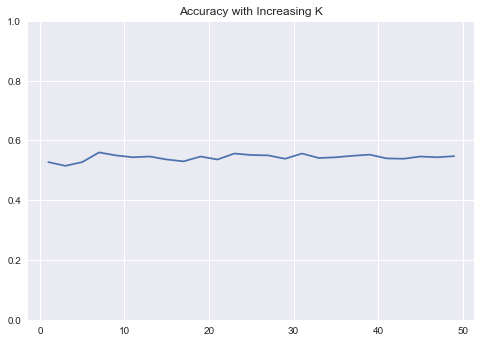

In [21]:
plt.plot(results.n, results.accuracy)
plt.title("Accuracy with Increasing K")
plt.ylim(0,1)
plt.show()

# explained variance

In [14]:
normalized_eigenvalues = pca.explained_variance_ratio_

In [15]:
normalized_eigenvalues

array([  1.83736316e-01,   9.99224890e-02,   7.21135180e-02, ...,
         1.77553728e-06,   1.69312639e-06,   5.32299389e-32])

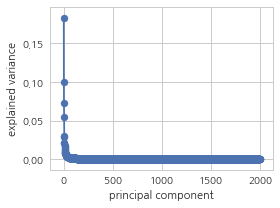

In [29]:
plt.figure(figsize=(4,3))
plt.plot(normalized_eigenvalues)

plt.scatter(x = range(len(normalized_eigenvalues)),
    y = normalized_eigenvalues,
    marker = 'o',
    s = 50)

plt.ylabel('explained variance')
plt.xlabel('principal component')

plt.show()


In [17]:
cumsum_eigenvalues=np.cumsum(normalized_eigenvalues)

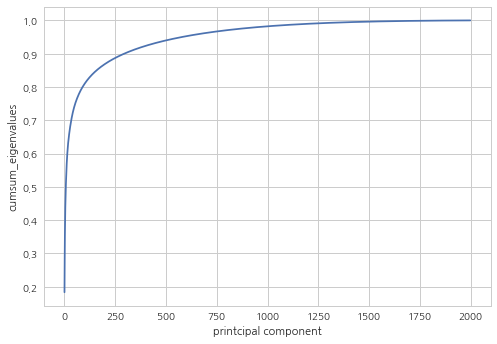

In [18]:
plt.figure(figsize=(4,3))

plt.ylabel("cumsum_eigenvalues")
plt.xlabel("printcipal component")
plt.plot(cumsum_eigenvalues)
plt.savefig ('cumsum_eigenvalues', dpi=300, transparent=True)

plt.show()

# n_components=4

In [19]:
pca=decomposition.PCA(n_components=4).fit(train_x)

In [20]:
train_x=pca.transform(train_x)

In [21]:
train_x.shape

(2000, 4)

In [22]:
train_x.shape[0]

2000

In [25]:
int(train_x.shape[0]*(kcv-1)/kcv)

1800

# hyperparameter determinations

In [24]:
kcv= 10
k_nn=range(1,int(train_x.shape[0]*(kcv-1)/kcv))


In [26]:
from sklearn import preprocessing, neighbors, grid_search, cross_validation, decomposition, metrics

In [27]:
gs = grid_search.GridSearchCV(
    estimator = neighbors.KNeighborsClassifier(weights='distance'),
    param_grid = {'n_neighbors': k_nn, 'weights': ['uniform', 'distance']},
    cv = cross_validation.StratifiedKFold(y_train, n_folds = kcv,random_state=0)

)

In [28]:
gs.fit(train_x,y_train)



GridSearchCV(cv=sklearn.cross_validation.StratifiedKFold(labels=[1 1 ..., 0 0], n_folds=10, shuffle=False, random_state=0),
       error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='distance'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 7...89, 1790, 1791, 1792, 1793, 1794, 1795, 1796, 1797, 1798, 1799], 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [30]:
score_df = pd.DataFrame({'k': [score.parameters['n_neighbors'] for score in gs.grid_scores_],
        'weights': [score.parameters['weights'] for score in gs.grid_scores_],
        'score': [score.mean_validation_score for score in gs.grid_scores_]})

score_df

,k,score,weights
0,1,0.5115,uniform
1,1,0.5115,distance
2,2,0.5275,uniform
3,2,0.5115,distance
4,3,0.5325,uniform
5,3,0.5300,distance
6,4,0.5285,uniform
7,4,0.5215,distance
8,5,0.5280,uniform
9,5,0.5190,distance


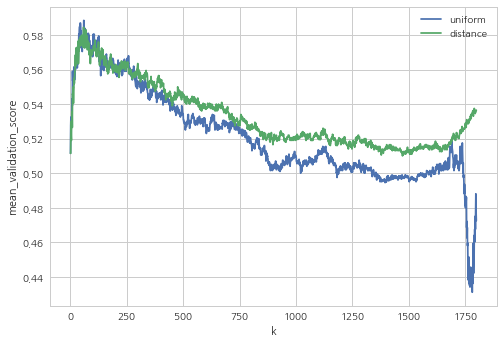

In [32]:
score_uniform_df = score_df[score_df.weights == 'uniform']
plt.plot(score_uniform_df.k, score_uniform_df.score, label = 'uniform')

score_distance_df = score_df[score_df.weights == 'distance']
plt.plot(score_distance_df.k, score_distance_df.score, label = 'distance')

plt.xlabel("k")
plt.ylabel("mean_validation_score")
plt.savefig ('cumsum_eigenvalues', dpi=300, transparent=True)

plt.legend()
plt.show()

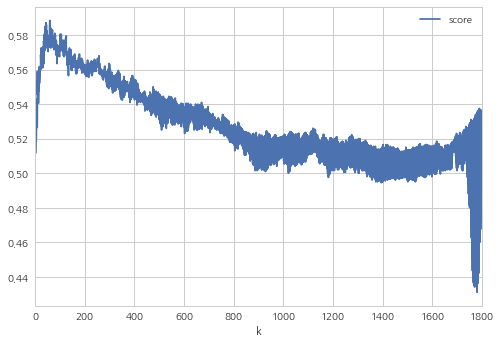

In [33]:
score_df.plot(x = 'k', y = 'score')
plt.show()

In [34]:

score_df[score_df.score == score_df.score.max()]

,k,score,weights
118,60,0.5885,uniform


In [35]:

gs.best_params_

{'n_neighbors': 60, 'weights': 'uniform'}

In [36]:
gs.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=60, p=2,
           weights='uniform')

# training test

In [37]:
model = neighbors.KNeighborsClassifier(n_neighbors = gs.best_params_['n_neighbors'], weights = gs.best_params_['weights']).\
    fit(train_x, y_train)

In [38]:
training_accuracy = model.score(train_x,y_train)

In [39]:
training_accuracy

0.61350000000000005

In [40]:
print("The KNN model has a training accuracy {} %.".format(training_accuracy * 100.))

The KNN model has a training accuracy 61.35 %.


# test

In [1]:
pca = decomposition.PCA(n_components = 4).fit(x_test)
test_X = pca.transform(x_test)

NameError: name 'decomposition' is not defined

In [145]:
testing_accuracy = model.score(test_X,y_test)

In [150]:
print("The KNN model has a testing accuracy {} %.".format(testing_accuracy * 100.))

The KNN model has a testing accuracy 49.75 %.


In [151]:
print (classification_report(y_test,model.predict(test_X)))

             precision    recall  f1-score   support

          0       0.50      0.80      0.61       400
          1       0.49      0.19      0.28       400

avg / total       0.50      0.50      0.45       800

